In [156]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project7_Loan_defaulter_naive-bayes")
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project7_Loan_defaulter_naive-bayes'

In [158]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x: "% .3f"%x)


In [159]:
data=pd.read_csv(r"ML Project - Naive Bayes Loan Status Classification U16955482770.csv")
data.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.000,24,3913.000,312.000,689.000,NaN,NaN,NaN,NaN,689.000,NaN,NaN,NaN,NaN,Default
1,2,12.000,26,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,NaN,1.000,1.000,1.000,NaN,2.000,Default
2,3,9.000,34,29239.000,1427.000,13559.000,14331.000,14948.000,15549.000,1518.000,15.000,1.000,1.000,1.000,5.000,Not Default
3,4,5.000,37,4699.000,48233.000,49291.000,28314.000,28959.000,29547.000,2.000,219.000,12.000,11.000,169.000,1.000,Not Default
4,5,5.000,57,8617.000,567.000,35835.000,294.000,19146.000,19131.000,2.000,36681.000,1.000,9.000,689.000,679.000,Not Default


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [161]:
data.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000,30000.000,30000.000,27992.000,27494.000,27130.000,26805.000,26494.000,25980.000,24751.000,24604.000,24032.000,23592.000,23297.000,22827.000
mean,10666.661,14.649,32.428,33989.495,33938.750,32617.867,30709.504,29015.123,28526.277,2613.958,2922.762,2584.509,2250.186,2300.376,2608.766
std,9698.092,189.497,12.719,61569.150,60904.557,58654.145,54827.114,51729.302,51625.822,12548.633,18498.905,12242.049,11056.958,11071.445,13358.163
min,1.000,1.000,3.000,-154973.000,-69777.000,-157264.000,-81334.000,-81334.000,-94625.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,1850.500,4.000,26.000,1574.000,1556.000,1534.000,1433.000,1327.000,1261.000,15.000,14.000,8.000,6.000,5.000,5.000
50%,7483.500,9.000,33.000,8551.500,8697.500,8889.500,8671.000,8131.500,7819.000,166.000,164.000,119.000,75.000,75.000,78.000
75%,18746.250,21.000,41.000,38251.750,38605.500,36534.250,32855.000,29680.500,29459.750,1667.000,1662.000,1381.250,983.000,982.000,1133.000
max,29999.000,32768.000,79.000,964511.000,983931.000,693131.000,891586.000,927171.000,961664.000,873552.000,1684259.000,417588.000,528897.000,426529.000,528666.000


In [162]:
## to see missing values in percentage of total
(data.isnull().sum()/len(data))*100

ID                 0.000
LIMIT_BAL          0.000
AGE                0.000
BILL_AMT1          6.693
BILL_AMT2          8.353
BILL_AMT3          9.567
BILL_AMT4         10.650
BILL_AMT5         11.687
BILL_AMT6         13.400
PAY_AMT1          17.497
PAY_AMT2          17.987
PAY_AMT3          19.893
PAY_AMT4          21.360
PAY_AMT5          22.343
PAY_AMT6          23.910
Default Status     0.000
dtype: float64

In [163]:
num_col=data.select_dtypes(exclude="object")
cat_col=data.select_dtypes(include="object")

In [164]:
## to see how many columns has missing values in percentage
(num_col.isnull().sum()/len(num_col))*100

ID            0.000
LIMIT_BAL     0.000
AGE           0.000
BILL_AMT1     6.693
BILL_AMT2     8.353
BILL_AMT3     9.567
BILL_AMT4    10.650
BILL_AMT5    11.687
BILL_AMT6    13.400
PAY_AMT1     17.497
PAY_AMT2     17.987
PAY_AMT3     19.893
PAY_AMT4     21.360
PAY_AMT5     22.343
PAY_AMT6     23.910
dtype: float64

### execessive missing values
mis=["PAY_AMT6","PAY_AMT5","PAY_AMT4","PAY_AMT3","PAY_AMT2","PAY_AMT1"]

for i in mis:
    num_col.drop(num_col[num_col[i].isnull()].index,inplace=True)

num_col.reset_index(drop=True)

num_col.drop(num_col[num_col["PAY_AMT6"].isnull()].index)

In [166]:
from sklearn.impute import KNNImputer

for col in num_col.columns:
    num_col[col]=num_col[col].fillna(num_col[col].mean())

In [167]:
model=KNNImputer()
num_col=pd.DataFrame(model.fit_transform(num_col),columns=num_col.columns)
num_col

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.000,2.000,24.000,3913.000,312.000,689.000,368.600,869.800,4044.200,479.400,689.000,368.600,907.000,1419.400,571.400
1,2.000,12.000,26.000,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,806.400,1.000,1.000,1.000,2080.800,2.000
2,3.000,9.000,34.000,29239.000,1427.000,13559.000,14331.000,14948.000,15549.000,1518.000,15.000,1.000,1.000,1.000,5.000
3,4.000,5.000,37.000,4699.000,48233.000,49291.000,28314.000,28959.000,29547.000,2.000,219.000,12.000,11.000,169.000,1.000
4,5.000,5.000,57.000,8617.000,567.000,35835.000,294.000,19146.000,19131.000,2.000,36681.000,1.000,9.000,689.000,679.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.000,22.000,39.000,188948.000,192815.000,28365.000,884.000,31237.000,1598.000,85.000,2.000,53.000,347.000,5.000,1.000
29996,29997.000,15.000,43.000,1683.000,1828.000,352.000,8979.000,519.000,1249.400,1837.000,3526.000,8998.000,129.000,1249.400,1318.600
29997,29998.000,3.000,37.000,3565.000,3356.000,2758.000,2878.000,2582.000,19357.000,793.800,2107.000,22.000,42.000,2.000,31.000
29998,29999.000,8.000,41.000,-1645.000,78379.000,7634.000,52774.000,11855.000,48944.000,859.000,349.000,1178.000,1926.000,52964.000,184.000


In [168]:
num_col.isnull().sum()

ID           0
LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [169]:
cat_col.isnull().sum()

Default Status    0
dtype: int64

In [170]:
data=pd.concat((num_col,cat_col),axis=1)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  float64
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  float64
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(15), object(1)
memory usage: 3.7+ MB


In [120]:
data.dropna(inplace=True)

In [121]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

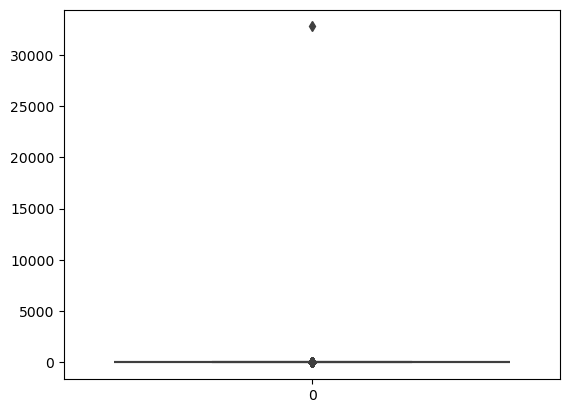

In [122]:
sns.boxplot(data["LIMIT_BAL"]);

<Axes: >

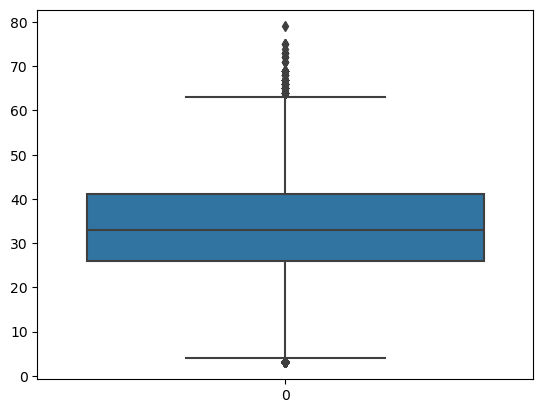

In [123]:
sns.boxplot(data["AGE"])

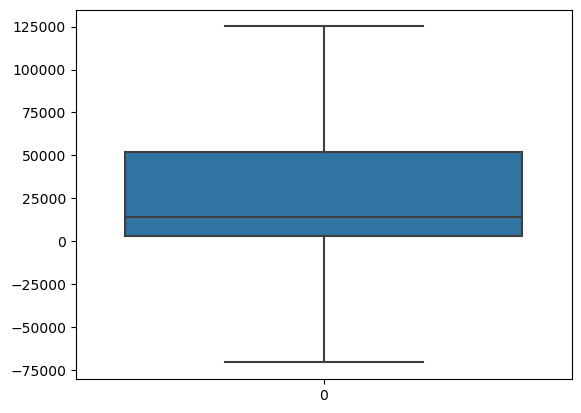

In [88]:
sns.boxplot(data["BILL_AMT1"]);

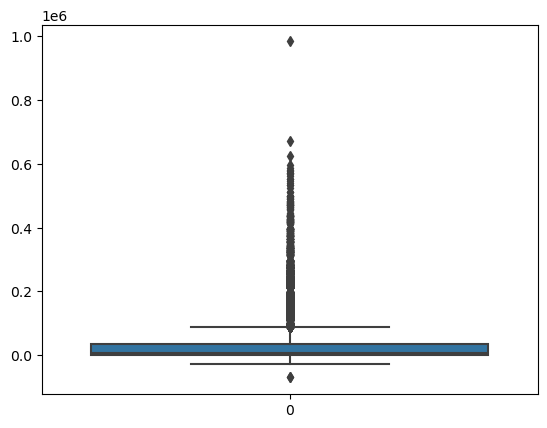

In [124]:
sns.boxplot(data["BILL_AMT2"]);

<Axes: >

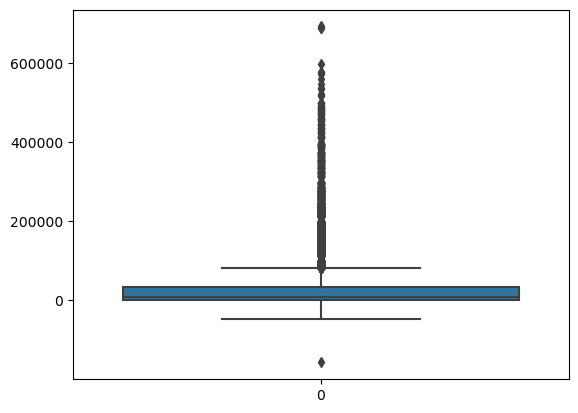

In [125]:
sns.boxplot(data["BILL_AMT3"])

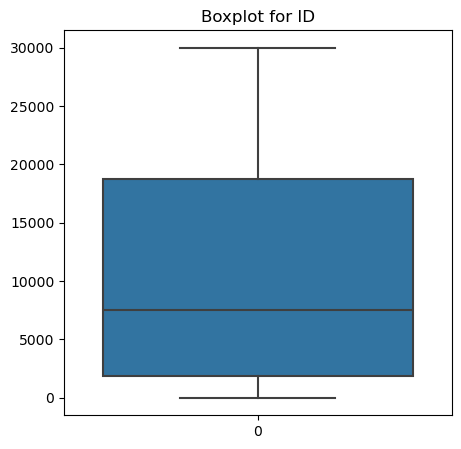

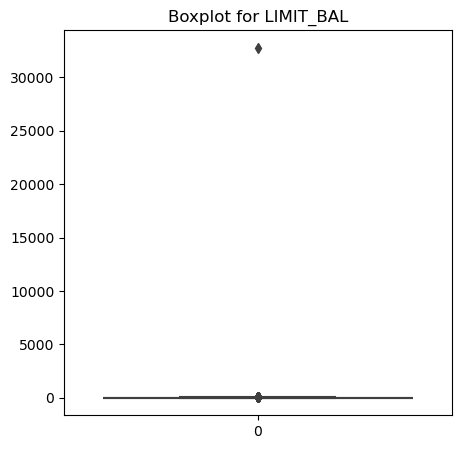

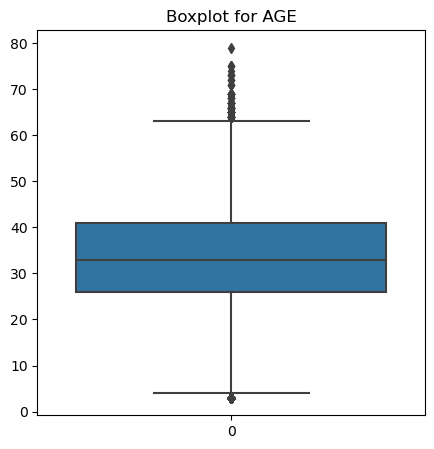

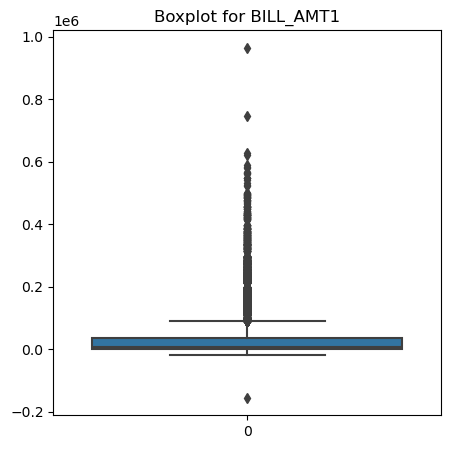

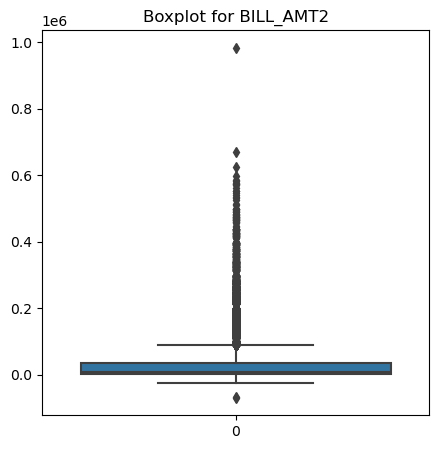

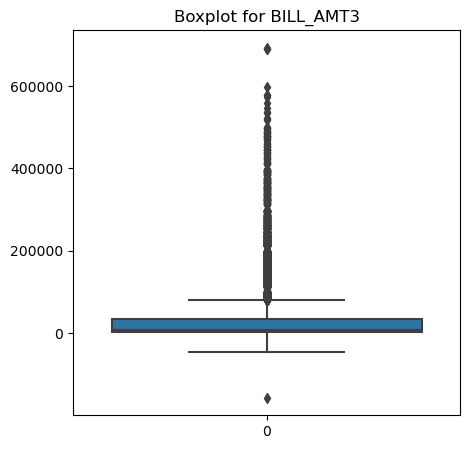

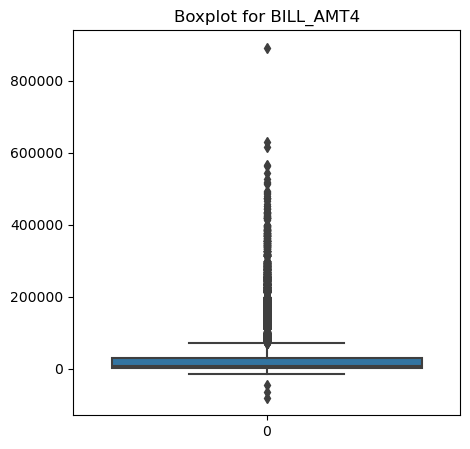

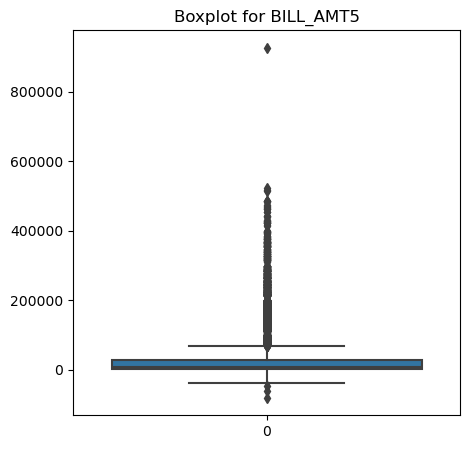

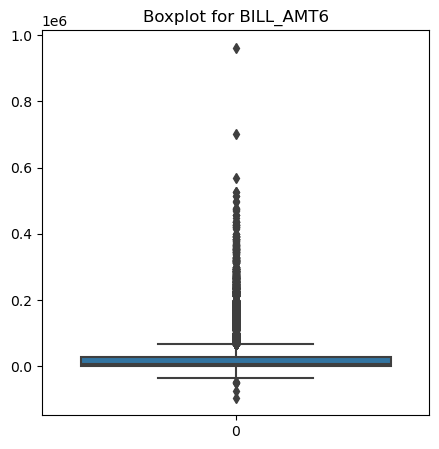

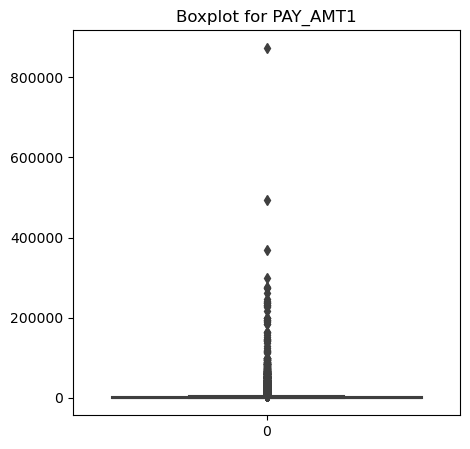

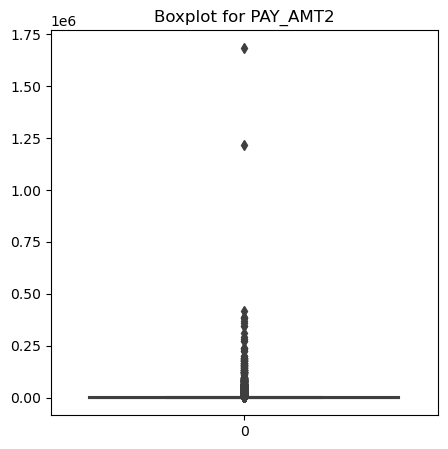

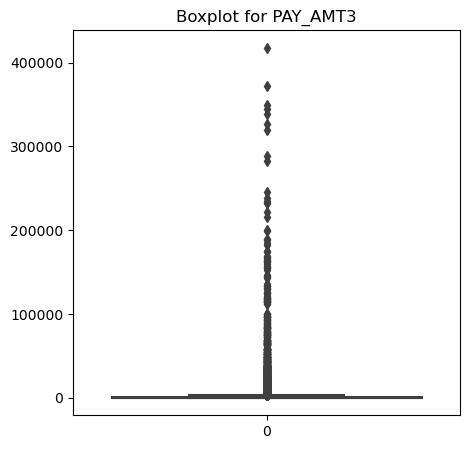

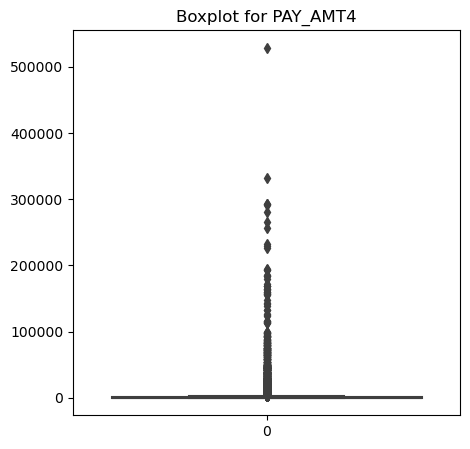

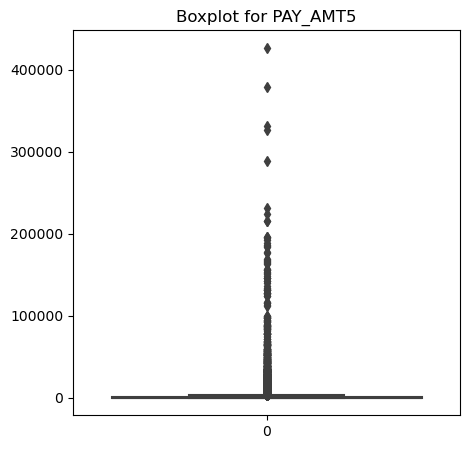

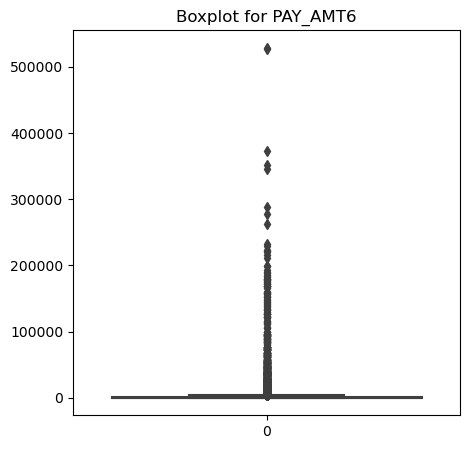

In [126]:
for col in num_col.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data[col]);
    plt.title(f"Boxplot for {col}")
    plt.show()

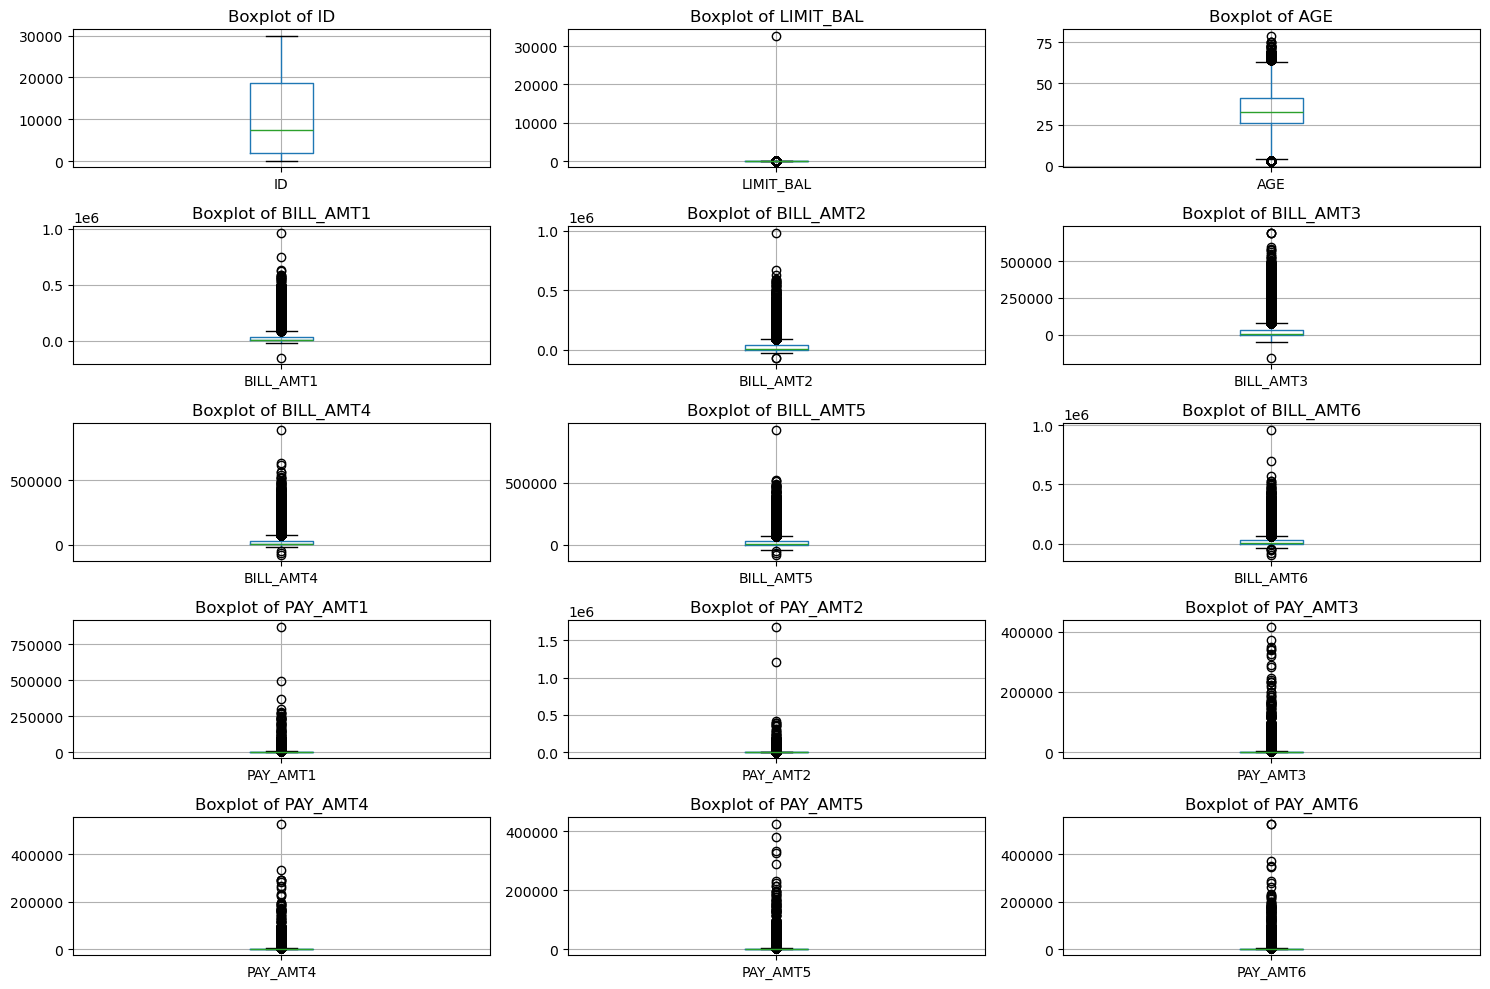

In [172]:
### very Important loop for checking boxplots of numeric columns and outlier treatment
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

### Loop through for numeric columns
for i,col in enumerate(num_col.columns):
    data.boxplot(column=col,ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

    
## hide any unused axes
for i in range(len(num_col.columns),len(axes)):
    fig.delaxes(axes[i]) ## Remove empty subplots
    
plt.tight_layout()
plt.show()

Explanation:
1 numeric_columns = df.select_dtypes(include=['number']).columns: Selects only numeric columns for boxplots.

2 n_cols and n_rows: Defines how many rows and columns will appear in the grid. This example sets 3 columns, and the number of rows is calculated automatically to fit all the boxplots.

3 plt.subplots(n_rows, n_cols, figsize=(15, 10)): Creates a grid of subplots with the specified number of rows and columns. The figsize controls the size of the overall figure.

4 axes.flatten(): Converts the 2D array of subplots into a 1D array to make indexing easier.

5 df.boxplot(column=column, ax=axes[i]): Plots each boxplot on its respective axis.

6 fig.delaxes(axes[i]): Removes any unused subplots if the number of boxplots is less than the number of subplots.

7 plt.tight_layout(): Adjusts spacing between subplots to ensure they are neatly organized.

In [93]:
### above boxplot show there so many columns have outliers , we have to treat them

In [173]:
def outlier_removal(data,columns):
    for col in columns:
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_lim=float(q1-1.5*IQR)
        upper_lim=float(q3+1.5*IQR)

        ### NOW LIMIT outliers
        data[col]=np.where(data[col] < lower_lim, lower_lim,data[col])
        data[col]=np.where(data[col] > upper_lim, upper_lim,data[col])
    return data

num_col=outlier_removal(num_col,num_col.columns)

In [174]:
data=pd.concat((num_col,cat_col),axis=1)

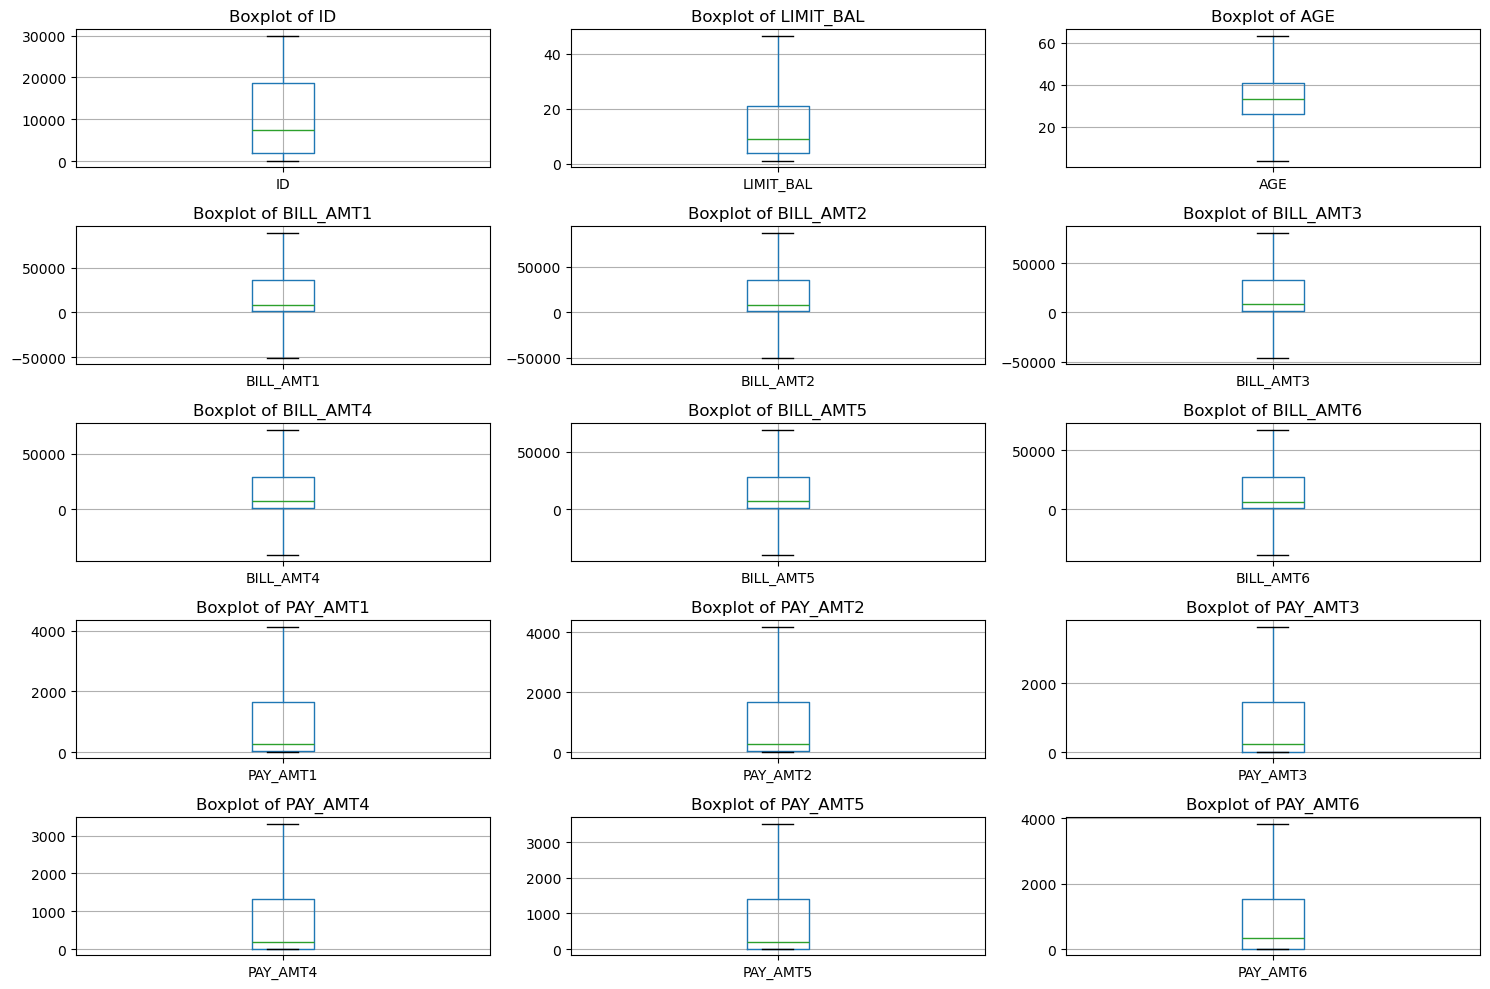

In [175]:
### very Important loop for checking boxplots of numeric columns and outlier treatment
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

### Loop through for numeric columns
for i,col in enumerate(num_col.columns):
    num_col.boxplot(column=col,ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

    
## hide any unused axes
for i in range(len(num_col.columns),len(axes)):
    fig.delaxes(axes[i]) ## Remove empty subplots
    
plt.tight_layout()
plt.show()

In [97]:
### most of outliers are removed by treating them

In [176]:
data.duplicated().sum()

0

In [177]:
data["Default Status"].value_counts()

Default Status
Not Default    23364
Default         6636
Name: count, dtype: int64

In [178]:
# Feature encoding
data["Default Status"]=data["Default Status"].map({"Not Default":0, "Default":1})

# Model creation

In [179]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [180]:
x=data.drop("Default Status",axis=1)
y=data["Default Status"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=42)
x_train.shape

(24000, 15)

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,recall_score,precision_score,f1_score

In [182]:
model= GaussianNB(priors=None, var_smoothing=1e-09)
model.fit(x_train,y_train)


GaussianNB()

In [183]:
train_accuracy=model.score(x_train,y_train)
print(f"Train Accuracy:-> {train_accuracy}")
test_accuracy=model.score(x_test,y_test)
print(f"Test Accuracy:-> {test_accuracy}")

y_pred=model.predict(x_test)


Train Accuracy:-> 0.769375
Test Accuracy:-> 0.7711666666666667


In [184]:
confusion_matrix(y_test,y_pred)

array([[4583,  104],
       [1269,   44]], dtype=int64)

In [185]:
recall_score(y_test,y_pred)

0.03351104341203351

In [186]:
precision_score(y_test,y_pred)

0.2972972972972973

In [187]:
f1_score(y_test,y_pred)

0.060232717316906215

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4687
           1       0.30      0.03      0.06      1313

    accuracy                           0.77      6000
   macro avg       0.54      0.51      0.46      6000
weighted avg       0.68      0.77      0.69      6000



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xg
import catboost as cb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score


In [152]:
lis=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,xg.XGBClassifier,cb.CatBoostClassifier,KNeighborsClassifier,GaussianNB]

In [153]:
output_result={
    "Model_Name":[],
    "Train_Accuracy":[],
    "Test_Accuracy":[],
    "Recall_for_0":[],
    "Recall_for_1":[],
    "Precision_for_0":[],
    "Precision_for_1":[],
    "F1_score_0":[],
    "F1_score_1":[]
}

In [155]:
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    output_result["Model_Name"].append(name)
    print(f"Model Name:->{name}")
    model.fit(x_train,y_train)
    
    train_acc=model.score(x_train,y_train)
    output_result["Train_Accuracy"].append(train_acc)
    print(f"Train Accuracy:->{train_acc}")
    
    test_acc=model.score(x_test,y_test)
    output_result["Test_Accuracy"].append(test_acc)
    print(f"Test Accuracy:->{test_acc}")
    
    
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[::,1]
    
    auc=roc_auc_score(y_test,y_pred_proba)
    print(f"Auc score of madel:--->{auc}")
    
    Recall=recall_score(y_test,y_pred,average=None)
    output_result["Recall_for_0"].append(Recall[0])
    output_result["Recall_for_1"].append(Recall[1])
    print(f"Recall score:->{Recall}")
    
    Precision=precision_score(y_test,y_pred,average=None)
    output_result["Precision_for_0"].append(Precision[0])
    output_result["Precision_for_1"].append(Precision[1])
    print(f"Precision score:->{Precision}")
    
    F1=f1_score(y_test,y_pred,average=None)
    output_result["F1_score_0"].append(F1[0])
    output_result["F1_score_1"].append(F1[1])
    print(f"F1 score:-> {F1}")
    
    roc_score=roc_auc_score(y_test,y_pred_proba)
    print(f"Roc score:--->{roc_score}")
    
    print("\n")
    

Model Name:->LogisticRegression
Train Accuracy:->0.7782083333333333
Test Accuracy:->0.7811666666666667
Auc score of madel:--->0.5551686366220775
Recall score:->[1. 0.]
Precision score:->[0.78116667 0.        ]
F1 score:-> [0.87714045 0.        ]


Model Name:->DecisionTreeClassifier
Train Accuracy:->1.0
Test Accuracy:->0.6643333333333333
Auc score of madel:--->0.5255500012918362
Recall score:->[0.77234905 0.27875095]
Precision score:->[0.79264287 0.25540823]
F1 score:-> [0.78236438 0.26656956]


Model Name:->RandomForestClassifier
Train Accuracy:->1.0
Test Accuracy:->0.7825
Auc score of madel:--->0.6221252379131662
Recall score:->[0.99551952 0.02208682]
Precision score:->[0.78420168 0.58      ]
F1 score:-> [0.87731503 0.04255319]


Model Name:->GradientBoostingClassifier
Train Accuracy:->0.7816666666666666
Test Accuracy:->0.7835
Auc score of madel:--->0.6418813132400536
Recall score:->[0.99893322 0.01447068]
Precision score:->[0.7834672  0.79166667]
F1 score:-> [0.87817687 0.02842184]


142:	learn: 0.4928154	total: 4.6s	remaining: 27.5s
143:	learn: 0.4926916	total: 4.68s	remaining: 27.8s
144:	learn: 0.4925657	total: 4.71s	remaining: 27.8s
145:	learn: 0.4924280	total: 4.74s	remaining: 27.8s
146:	learn: 0.4922848	total: 4.78s	remaining: 27.7s
147:	learn: 0.4921155	total: 4.82s	remaining: 27.7s
148:	learn: 0.4920168	total: 4.85s	remaining: 27.7s
149:	learn: 0.4918691	total: 4.89s	remaining: 27.7s
150:	learn: 0.4917410	total: 4.92s	remaining: 27.7s
151:	learn: 0.4916213	total: 4.95s	remaining: 27.6s
152:	learn: 0.4914255	total: 4.98s	remaining: 27.6s
153:	learn: 0.4912881	total: 5.02s	remaining: 27.6s
154:	learn: 0.4911247	total: 5.06s	remaining: 27.6s
155:	learn: 0.4909772	total: 5.09s	remaining: 27.6s
156:	learn: 0.4908311	total: 5.13s	remaining: 27.5s
157:	learn: 0.4907253	total: 5.16s	remaining: 27.5s
158:	learn: 0.4905915	total: 5.19s	remaining: 27.5s
159:	learn: 0.4904475	total: 5.23s	remaining: 27.5s
160:	learn: 0.4903141	total: 5.28s	remaining: 27.5s
161:	learn: 0

303:	learn: 0.4718565	total: 10s	remaining: 23s
304:	learn: 0.4716985	total: 10.1s	remaining: 22.9s
305:	learn: 0.4715608	total: 10.1s	remaining: 22.9s
306:	learn: 0.4714201	total: 10.2s	remaining: 22.9s
307:	learn: 0.4712980	total: 10.2s	remaining: 22.9s
308:	learn: 0.4711593	total: 10.3s	remaining: 22.9s
309:	learn: 0.4710368	total: 10.3s	remaining: 23s
310:	learn: 0.4709248	total: 10.4s	remaining: 23s
311:	learn: 0.4708175	total: 10.4s	remaining: 23s
312:	learn: 0.4706684	total: 10.4s	remaining: 22.9s
313:	learn: 0.4704778	total: 10.5s	remaining: 22.9s
314:	learn: 0.4703617	total: 10.5s	remaining: 22.8s
315:	learn: 0.4702169	total: 10.5s	remaining: 22.8s
316:	learn: 0.4701348	total: 10.6s	remaining: 22.8s
317:	learn: 0.4699969	total: 10.6s	remaining: 22.8s
318:	learn: 0.4698926	total: 10.7s	remaining: 22.9s
319:	learn: 0.4697306	total: 10.8s	remaining: 22.9s
320:	learn: 0.4695611	total: 10.8s	remaining: 22.9s
321:	learn: 0.4694351	total: 10.8s	remaining: 22.8s
322:	learn: 0.4692783	

462:	learn: 0.4513758	total: 16.6s	remaining: 19.3s
463:	learn: 0.4512992	total: 16.7s	remaining: 19.3s
464:	learn: 0.4512061	total: 16.7s	remaining: 19.2s
465:	learn: 0.4510928	total: 16.7s	remaining: 19.2s
466:	learn: 0.4510029	total: 16.8s	remaining: 19.1s
467:	learn: 0.4508884	total: 16.8s	remaining: 19.1s
468:	learn: 0.4507867	total: 16.8s	remaining: 19.1s
469:	learn: 0.4506460	total: 16.9s	remaining: 19s
470:	learn: 0.4505245	total: 16.9s	remaining: 19s
471:	learn: 0.4504066	total: 17s	remaining: 19s
472:	learn: 0.4502873	total: 17s	remaining: 18.9s
473:	learn: 0.4501716	total: 17s	remaining: 18.9s
474:	learn: 0.4500677	total: 17.1s	remaining: 18.9s
475:	learn: 0.4499415	total: 17.1s	remaining: 18.9s
476:	learn: 0.4498215	total: 17.2s	remaining: 18.8s
477:	learn: 0.4496813	total: 17.2s	remaining: 18.8s
478:	learn: 0.4494833	total: 17.3s	remaining: 18.8s
479:	learn: 0.4493800	total: 17.4s	remaining: 18.8s
480:	learn: 0.4492816	total: 17.4s	remaining: 18.8s
481:	learn: 0.4491672	to

622:	learn: 0.4334995	total: 22.8s	remaining: 13.8s
623:	learn: 0.4334311	total: 22.9s	remaining: 13.8s
624:	learn: 0.4333189	total: 22.9s	remaining: 13.7s
625:	learn: 0.4331983	total: 22.9s	remaining: 13.7s
626:	learn: 0.4330725	total: 23s	remaining: 13.7s
627:	learn: 0.4329574	total: 23s	remaining: 13.6s
628:	learn: 0.4328722	total: 23s	remaining: 13.6s
629:	learn: 0.4327610	total: 23.1s	remaining: 13.5s
630:	learn: 0.4326217	total: 23.1s	remaining: 13.5s
631:	learn: 0.4325152	total: 23.1s	remaining: 13.5s
632:	learn: 0.4324063	total: 23.2s	remaining: 13.4s
633:	learn: 0.4323153	total: 23.2s	remaining: 13.4s
634:	learn: 0.4322134	total: 23.2s	remaining: 13.4s
635:	learn: 0.4320810	total: 23.3s	remaining: 13.3s
636:	learn: 0.4319910	total: 23.3s	remaining: 13.3s
637:	learn: 0.4318875	total: 23.4s	remaining: 13.3s
638:	learn: 0.4317472	total: 23.5s	remaining: 13.3s
639:	learn: 0.4316311	total: 23.5s	remaining: 13.2s
640:	learn: 0.4315223	total: 23.6s	remaining: 13.2s
641:	learn: 0.4313

784:	learn: 0.4163640	total: 28.9s	remaining: 7.92s
785:	learn: 0.4162706	total: 29s	remaining: 7.89s
786:	learn: 0.4162103	total: 29s	remaining: 7.86s
787:	learn: 0.4161294	total: 29.1s	remaining: 7.82s
788:	learn: 0.4160193	total: 29.1s	remaining: 7.79s
789:	learn: 0.4158751	total: 29.2s	remaining: 7.76s
790:	learn: 0.4157631	total: 29.2s	remaining: 7.72s
791:	learn: 0.4156702	total: 29.3s	remaining: 7.69s
792:	learn: 0.4155699	total: 29.3s	remaining: 7.65s
793:	learn: 0.4154411	total: 29.4s	remaining: 7.62s
794:	learn: 0.4153155	total: 29.4s	remaining: 7.58s
795:	learn: 0.4152354	total: 29.4s	remaining: 7.54s
796:	learn: 0.4151600	total: 29.5s	remaining: 7.5s
797:	learn: 0.4151100	total: 29.5s	remaining: 7.46s
798:	learn: 0.4149889	total: 29.5s	remaining: 7.43s
799:	learn: 0.4149174	total: 29.6s	remaining: 7.39s
800:	learn: 0.4148385	total: 29.6s	remaining: 7.36s
801:	learn: 0.4147737	total: 29.7s	remaining: 7.32s
802:	learn: 0.4147121	total: 29.7s	remaining: 7.28s
803:	learn: 0.414

946:	learn: 0.4009801	total: 35s	remaining: 1.96s
947:	learn: 0.4008870	total: 35.1s	remaining: 1.93s
948:	learn: 0.4007601	total: 35.1s	remaining: 1.89s
949:	learn: 0.4006766	total: 35.2s	remaining: 1.85s
950:	learn: 0.4006127	total: 35.2s	remaining: 1.81s
951:	learn: 0.4005278	total: 35.2s	remaining: 1.77s
952:	learn: 0.4004355	total: 35.3s	remaining: 1.74s
953:	learn: 0.4003704	total: 35.3s	remaining: 1.7s
954:	learn: 0.4002830	total: 35.3s	remaining: 1.66s
955:	learn: 0.4002017	total: 35.4s	remaining: 1.63s
956:	learn: 0.4001160	total: 35.4s	remaining: 1.59s
957:	learn: 0.4000006	total: 35.5s	remaining: 1.55s
958:	learn: 0.3999189	total: 35.5s	remaining: 1.52s
959:	learn: 0.3998335	total: 35.6s	remaining: 1.48s
960:	learn: 0.3997583	total: 35.6s	remaining: 1.44s
961:	learn: 0.3996582	total: 35.6s	remaining: 1.41s
962:	learn: 0.3995486	total: 35.6s	remaining: 1.37s
963:	learn: 0.3994519	total: 35.7s	remaining: 1.33s
964:	learn: 0.3993446	total: 35.7s	remaining: 1.29s
965:	learn: 0.3

In [148]:
output_result1=pd.DataFrame(output_result)
output_result1["train_test_diff"]=output_result1["Train_Accuracy"]-output_result1["Test_Accuracy"]
output_result1.sort_values(by="Test_Accuracy",ascending=False)

,Model_Name,Train_Accuracy,Test_Accuracy,Recall_for_0,Recall_for_1,Precision_for_0,Precision_for_1,F1_score_0,F1_score_1,train_test_diff
6,CatBoostClassifier,0.807,0.784,0.993,0.038,0.787,0.617,0.878,0.072,0.023
3,GradientBoostingClassifier,0.782,0.783,0.999,0.014,0.783,0.792,0.878,0.028,-0.002
2,RandomForestClassifier,1.000,0.781,0.995,0.019,0.784,0.521,0.877,0.037,0.219
0,LogisticRegression,0.778,0.781,1.000,0.000,0.781,0.000,0.877,0.000,-0.003
4,SVC,0.778,0.781,1.000,0.000,0.781,0.000,0.877,0.000,-0.003
8,GaussianNB,0.769,0.771,0.978,0.034,0.783,0.297,0.870,0.060,-0.002
5,XGBClassifier,0.887,0.771,0.963,0.085,0.790,0.389,0.868,0.139,0.116
7,KNeighborsClassifier,0.804,0.735,0.907,0.122,0.787,0.269,0.843,0.168,0.069
1,DecisionTreeClassifier,1.000,0.658,0.763,0.284,0.792,0.252,0.777,0.267,0.342


Confusion Matrix:
The confusion matrix is structured as follows for a binary classification:

Predicted: 0	Predicted: 1
Actual: 0	True Negative (TN)	False Positive (FP)
Actual: 1	False Negative (FN)	True Positive (TP)
True Negatives (TN): The model correctly predicted class 0 (negative class).
False Positives (FP): The model incorrectly predicted class 1 when the actual class was 0. Also called a Type I error.
False Negatives (FN): The model incorrectly predicted class 0 when the actual class was 1. Also called a Type II error.
True Positives (TP): The model correctly predicted class 1 (positive class).
Now let's explain precision and recall in terms of class 0 and class 1.

1. Recall:
Recall (also called Sensitivity or True Positive Rate) measures how well the model can identify positive instances (class 1).

Recall
=
True Positives (TP)
True Positives (TP)
+
False Negatives (FN)
Recall= 
True Positives (TP)+False Negatives (FN)
True Positives (TP)
​
 
For class 1: It tells us the proportion of actual positives (class 1) that the model correctly identified as positive.
A high recall means that the model correctly predicted most of the true class 1 instances.
For class 0: If you're interested in identifying class 0, recall can be defined as how well the model identifies negative instances (class 0).
In that case, the formula for recall becomes:
Recall (class 0)
=
True Negatives (TN)
True Negatives (TN)
+
False Positives (FP)
Recall (class 0)= 
True Negatives (TN)+False Positives (FP)
True Negatives (TN)
​
 
It tells you how many of the actual class 0 instances were correctly predicted as class 0.
2. Precision:
Precision (also called Positive Predictive Value) measures how many of the predicted positives (class 1) are actually correct.

Precision
=
True Positives (TP)
True Positives (TP)
+
False Positives (FP)
Precision= 
True Positives (TP)+False Positives (FP)
True Positives (TP)
​
 
For class 1: It tells us the proportion of instances predicted as class 1 that are actually class 1.
A high precision means that when the model predicts class 1, it is correct most of the time.
For class 0: If you're more interested in precision for class 0, it would tell us the proportion of instances predicted as class 0 that are actually class 0.
In that case, the formula for precision becomes:
Precision (class 0)
=
True Negatives (TN)
True Negatives (TN)
+
False Negatives (FN)
Precision (class 0)= 
True Negatives (TN)+False Negatives (FN)
True Negatives (TN)
​
 
It tells you how many of the predicted class 0 instances were truly class 0.
Summary of Recall and Precision:
For Class 1 (Positive Class):
Recall (class 1): How well the model identifies actual class 1 instances.
Precision (class 1): How accurate the model is when it predicts class 1.
For Class 0 (Negative Class):
Recall (class 0): How well the model identifies actual class 0 instances.
Precision (class 0): How accurate the model is when it predicts class 0.
Example:
Assume the following confusion matrix:

Predicted: 0	Predicted: 1
Actual: 0	TN = 50	FP = 10
Actual: 1	FN = 5	TP = 35
Recall (class 1):

Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
=
35
35
+
5
=
35
40
=
0.875
Recall= 
TP+FN
TP
​
 = 
35+5
35
​
 = 
40
35
​
 =0.875
The model correctly identified 87.5% of the actual class 1 instances.

Precision (class 1):

Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
=
35
35
+
10
=
35
45
=
0.778
Precision= 
TP+FP
TP
​
 = 
35+10
35
​
 = 
45
35
​
 =0.778
When the model predicted class 1, it was correct 77.8% of the time.

Recall (class 0):

Recall (class 0)
=
𝑇
𝑁
𝑇
𝑁
+
𝐹
𝑃
=
50
50
+
10
=
50
60
=
0.833
Recall (class 0)= 
TN+FP
TN
​
 = 
50+10
50
​
 = 
60
50
​
 =0.833
The model correctly identified 83.3% of the actual class 0 instances.

Precision (class 0):

Precision (class 0)
=
𝑇
𝑁
𝑇
𝑁
+
𝐹
𝑁
=
50
50
+
5
=
50
55
=
0.909
Precision (class 0)= 
TN+FN
TN
​
 = 
50+5
50
​
 = 
55
50
​
 =0.909
When the model predicted class 0, it was correct 90.9% of the time.

Key Takeaways:
Recall focuses on sensitivity — how well the model can detect the class.
Precision focuses on accuracy — how often the predicted class is correct.











In [ ]:
### context of data says that defaulter must not treated as not defulater,
#means no any 0 falsely identify as 1, that means recall scrore for 0 is must necessary things for this data